# Open Data

__Open Data__ refers to the concept of making _data freely available_ to the public, without any restrictions on its use, reuse, or redistribution. It is typically provided in a _machine-readable format_ and can be accessed and used by anyone for various purposes, such as research, analysis, and innovation. __Open Data__ plays a crucial role in promoting transparency, accountability, and collaboration in both the public and private sectors.

### Download and load CSV files

To load data from a _CSV_ file into a DataFrame, you can use the `df = pd.read_csv(url)` function from the pandas library. Use the actual _URL_ of the _CSV_ file you want to load. This code will download the CSV file from the specified URL and load it into the `df` DataFrame.

In [1]:
# https://catalog.data.gov/dataset/electric-vehicle-population-data
import pandas as pd
import numpy as np

# URL of the CSV file
url_csv = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'

# Download the CSV file and load it into a DataFrame
df = pd.read_csv(url_csv)
print(df.shape)

# convert column names
df = df.rename(columns={'Make': 'Brand'})

# drop nulls
df['County'] = df['County'].fillna('Unknown')
df['City'] = df['City'].fillna('Unknown')
df = df.dropna()

# convert to categorical features
df['County'] = df['County'].astype('category')
df['City'] = df['City'].astype('category')
df['Brand'] = df['Brand'].astype('category')
df['Model'] = df['Model'].astype('category')
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].astype('category')

# change data types
df['Model Year'] = df['Model Year'].astype('int16')
df['Legislative District'] = df['Legislative District'].astype('int8')
df['2020 Census Tract'] = df['2020 Census Tract'].astype('int64')

df.head()

(191407, 17)


,VIN (1-10),County,City,State,Postal Code,Model Year,Brand,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006500
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,53077002201
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033029306
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,53061052107
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14,221023589,POINT (-120.611068 46.596645),PACIFICORP,53077000902


In [2]:
# how many electric are by city?
car_by_city_df = df.groupby('City', observed=False).agg({'VIN (1-10)': 'count'}).reset_index()
car_by_city_df = car_by_city_df.rename(columns={'VIN (1-10)': 'Count'})
car_by_city_df = car_by_city_df.set_index('City')
car_by_city_df

,Count
City,
Aberdeen,175
Acme,10
Addy,2
Adna,1
Airway Heights,31
...,...
Yacolt,59
Yakima,755
Yarrow Point,151


In [3]:
# what is the electric range per brand and model?
range_df = df[df['Electric Range'] > 0].groupby(['Brand', 'Model'], observed=False).agg({'Electric Range': 'mean'}).reset_index()
range_df = range_df.sort_values(by='Electric Range', ascending=False)
range_df

,Brand,Model,Electric Range
5377,TESLA,MODEL Y,291.000000
2430,HYUNDAI,KONA,258.000000
1048,CHEVROLET,BOLT EV,244.853071
5376,TESLA,MODEL X,240.325678
5374,TESLA,MODEL 3,238.508762
...,...,...,...
6169,WHEEGO ELECTRIC CARS,XC40,NaN
6170,WHEEGO ELECTRIC CARS,XC60,NaN
6171,WHEEGO ELECTRIC CARS,XC90,NaN
6172,WHEEGO ELECTRIC CARS,XM,NaN


### Get a JSON from a URL and load

To load data from a _JSON_ file into a DataFrame, you can use the `df = pd.read_json(url)` function from the pandas library. Use the actual _URL_ of the _JSON_ file you want to load. This code will download the _JSON_ file from the specified URL and load it into the `df` DataFrame.

In [4]:
# https://jsonplaceholder.typicode.com/

import requests

# URL of the JSON file
url_json = 'https://jsonplaceholder.typicode.com/comments'

# Download the JSON file
response = requests.get(url_json)
data = response.json()
print(type(data))

# Load the JSON data into a DataFrame
df = pd.DataFrame(data)
print(df.shape)
df.head()

<class 'list'>
(500, 5)


,postId,id,name,email,body
0,1,1,id labore ex et quam laborum,Eliseo@gardner.biz,laudantium enim quasi est quidem magnam volupt...
1,1,2,quo vero reiciendis velit similique earum,Jayne_Kuhic@sydney.com,est natus enim nihil est dolore omnis voluptat...
2,1,3,odio adipisci rerum aut animi,Nikita@garfield.biz,quia molestiae reprehenderit quasi aspernatur\...
3,1,4,alias odio sit,Lew@alysha.tv,non et atque\noccaecati deserunt quas accusant...
4,1,5,vero eaque aliquid doloribus et culpa,Hayden@althea.biz,harum non quasi et ratione\ntempore iure ex vo...


### Consumming Free Public APIs

To load data from a _public web API_ into a DataFrame, you can use the `pd.read_json(url)` function from the pandas library. Replace the `url` variable with the actual URL of the _API endpoint_.

In [5]:
# NASA picture of the day API
# https://api.nasa.gov/

import sys
import requests
from datetime import datetime, timedelta

# NASA API key
api_key = "CFWfPlCkmvdkkGgnslhSaJNPiASCg5bRCTzNeK9n"

# Calculate dates
end_date = (datetime.now() - timedelta(days=1)).strftime("%Y-%m-%d")
start_date = (datetime.now() - timedelta(days=31)).strftime("%Y-%m-%d")

# API URL with parameters
api_url = f'https://api.nasa.gov/planetary/apod?api_key={api_key}&start_date={start_date}&end_date={end_date}'

# Make the API request
response = requests.get(api_url)
if response.status_code == 200:
    nasa_data = response.json()
else:
    print("ERROR. Failed to retrieve data from NASA.")
    sys.exit()

# Load the JSON data into a DataFrame
nasa_df = pd.DataFrame(nasa_data)
nasa_df = nasa_df.drop(columns=['service_version'], axis=1)
nasa_df['media_type'] = nasa_df['media_type'].astype('category')
nasa_df['date'] = pd.to_datetime(nasa_df['date'])
nasa_df = nasa_df[['date', 'title', 'explanation', 'url', 'hdurl', 'media_type', 'copyright']]
nasa_df.to_csv('csv-files/nasa_photos.csv', index=False)
nasa_df.head() 

,date,title,explanation,url,hdurl,media_type,copyright
0,2024-06-02,Rotating Moon from LRO,"No one, presently, sees the Moon rotate like t...",https://www.youtube.com/embed/sNUNB6CMnE8?rel=0,NaN,video,NaN
1,2024-06-03,NGC 2403 in Camelopardalis,Magnificent island universe NGC 2403 stands wi...,https://apod.nasa.gov/apod/image/2405/NGC2403-...,https://apod.nasa.gov/apod/image/2405/NGC2403-...,image,(Team F.A.C.T.)
2,2024-06-04,Comet Pons-Brooks Develops Opposing Tails,Why does Comet Pons-Brooks now have tails poin...,https://apod.nasa.gov/apod/image/2406/Comet12P...,https://apod.nasa.gov/apod/image/2406/Comet12P...,image,\nRolando Ligustri &\n Lukas Demetz \n
3,2024-06-05,Shadow of a Martian Robot,What if you saw your shadow on Mars and it was...,https://apod.nasa.gov/apod/image/2406/NeretvaV...,https://apod.nasa.gov/apod/image/2406/NeretvaV...,image,NaN
4,2024-06-06,NGC 4565: Galaxy on Edge,Magnificent spiral galaxy NGC 4565 is viewed e...,https://apod.nasa.gov/apod/image/2406/278_lora...,https://apod.nasa.gov/apod/image/2406/278_lora...,image,Lóránd Fényes


In [6]:
# NY Times API
# https://developer.nytimes.com/docs/articlesearch-product/1/overview

import sys
import requests
import pandas as pd

# Parameters
query = "outer earth space exploration research"
api_key = "bi7nGsat8AZqwGQnK8xXjdmvG39A39YN"
pub_year = 2024

# Construct the API URL
ny_url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?\
                    q={query}&api-key={api_key}&\
                    begin_date={pub_year}0101&end_date={pub_year}1231"

# Make the GET request
response = requests.get(ny_url)
if response.status_code == 200:
    ny_data = response.json()
else:
    print("ERROR. Cannot retrieve data from NY Times.")
    sys.exit(1)

# Extract the articles
ny_times_df = pd.DataFrame(ny_data['response']['docs'])
ny_times_df.to_csv('csv-files/ny_times.csv', index=False)
ny_times_df.head()

,abstract,web_url,snippet,lead_paragraph,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name,print_section
0,Report of Senate Committee,https://www.nytimes.com/1858/01/27/archives/th...,Report of Senate Committee,,1,The New York Times,[],{'main': 'The Senate Committee on Foreign Rela...,[],1858-01-27T05:00:00+0000,article,None,Archives,"{'original': None, 'person': [], 'organization...",Archives,nyt://article/000000e6-a21c-54a9-9fa4-253d2eff...,0,nyt://article/000000e6-a21c-54a9-9fa4-253d2eff...,NaN,NaN
1,The Swiss event replaced James Levine with the...,https://www.nytimes.com/2015/07/21/arts/intern...,The Swiss event replaced James Levine with the...,"VERBIER, Switzerland — No one could have been ...",NaN,International New York Times,"[{'rank': 0, 'subtype': 'watch308', 'caption':...",{'main': 'Review: Verbier Festival Recovers in...,"[{'name': 'glocations', 'value': 'Switzerland'...",2015-07-20T10:53:05+0000,article,Culture,Arts,"{'original': 'By James R. Oestreich', 'person'...",News,nyt://article/00000469-7157-5655-8cfc-664eecc6...,1100,nyt://article/00000469-7157-5655-8cfc-664eecc6...,International Arts,NaN
2,congress backing project,https://www.nytimes.com/2000/10/29/us/congress...,congress backing project,"A few years back, the people of Toledo, Ohio, ...",1,The New York Times,[],{'main': 'CONGRESS BACKING PROJECTS AT HOME AT...,"[{'name': 'glocations', 'value': 'United State...",2000-10-29T05:00:00+0000,article,National Desk,U.S.,"{'original': 'By Eric Schmitt', 'person': [{'f...",News,nyt://article/00000799-c73f-56cb-ad84-3c4fe6c0...,1171,nyt://article/00000799-c73f-56cb-ad84-3c4fe6c0...,NaN,1
3,"Sheiner, Sidney",https://www.nytimes.com/1961/06/10/archives/si...,"Sheiner, Sidney",,23,The New York Times,[],"{'main': 'SIDNEY SHEINER, LABOR MEDIATOR; Comm...","[{'name': 'persons', 'value': 'SHEINER, SIDNEY...",1961-06-10T05:00:00+0000,article,None,Archives,"{'original': None, 'person': [], 'organization...",Archives,nyt://article/000007b4-2986-5eaa-9707-58216390...,0,nyt://article/000007b4-2986-5eaa-9707-58216390...,NaN,food fashion family furnishings
4,The industry federations of the four main Sc...,https://www.nytimes.com/1982/11/09/business/no...,,The industry federations of the four main Scan...,23,The New York Times,[],"{'main': 'Nordic Bourse Plan', 'kicker': None,...","[{'name': 'glocations', 'value': 'Denmark', 'r...",1982-11-09T05:00:00+0000,article,Financial Desk,Business Day,"{'original': 'Reuters', 'person': [], 'organiz...",News,nyt://article/00001251-0cd1-5a8b-a1d5-6d977a9a...,60,nyt://article/00001251-0cd1-5a8b-a1d5-6d977a9a...,NaN,D


### Web Scrapping

To load data from a website using _web scraping_ into a DataFrame, you can use the __BeautifulSoup__ library in combination with the __requests__ library. 

In [7]:
# web scraping from https://www.nytimes.com/2024/06/14/science/space/edward-stone-physicist-dead.html
# Install the en_core_web_lg model
#!pip install spacy
#!python -m spacy download en_core_web_lg
#!pip install BeautifulSoup4

import requests
import pandas as pd
import re
import spacy
from bs4 import BeautifulSoup

# Define a function to count words using regex
def count_words(text: str) -> int:
    return len(re.findall(r'\w+', text))

def get_keywords(text: str, nlp_model) -> str:
    document = nlp_model(text)
    context_keywords = ['space', 'astronomy', 'planet', 'moon', 'galaxy', 'cosmos', 'rocket']
    temp_keywords = [token for token in document if token.pos_ in ('NOUN', 'PROPN')]
    keywords = [(token.text).lower() for token in temp_keywords\
                 if any(token.similarity(nlp_model(keyword)) > 0.5 \
                for keyword in context_keywords)]
    return ', '.join(keywords)

# ------------ Web Scraping ------------

# URL of the website to scrape
url = 'https://www.nytimes.com/2024/06/14/science/space/edward-stone-physicist-dead.html'

# Headers to mimic a browser visit
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)\
                    AppleWebKit/537.36 (KHTML, like Gecko)\
                    Chrome/58.0.3029.110 Safari/537.3'
}

# Send a GET request to the website
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
else:
    print("ERROR. Failed to retrieve data using web scrapping.")
    sys.exit(1)

# Extract the article content
paragraphs = soup.find_all('p')
data = []
for paragraph in paragraphs:
    data.append( paragraph.get_text() )

# Create a DataFrame from the extracted data
scrapping_df = pd.DataFrame(data, columns=['content'])
scrapping_df = scrapping_df[scrapping_df['content'].apply(count_words) > 10]
scrapping_df = scrapping_df[~scrapping_df['content'].str.contains(r'Thank you for your patience', case=False, regex=True)]

# Make simple NLP analysis
nlp = spacy.load('en_core_web_lg')
scrapping_df['keywords'] = scrapping_df['content'].apply(lambda p: get_keywords(p, nlp))

# Print the DataFrame
print(scrapping_df.shape)
scrapping_df = scrapping_df.reset_index(drop=True)
scrapping_df.to_csv('csv-files/scrapping.csv', index=False)
scrapping_df.head()

(6, 2)


,content,keywords
0,He helped send the twin spacecraft on their wa...,"spacecraft, earth"
1,"Edward C. Stone, the visionary physicist who d...","physicist, spacecraft, planets"
2,Inspired by the launch of the Soviet satellite...,satellite
3,"Twin spacecraft, Voyager 1 and Voyager 2 were ...","spacecraft, space"
4,Dr. Stone was the program’s chief project scie...,"scientist, physics"


# Data Pre-Processing

__Pre-processing__ data is an essential step in the _data science workflow_. It involves _transforming raw data_ into a clean and structured format that is suitable for _analysis and modeling_. The __pre-processing__ process typically includes several steps such as _data cleaning_, _data integration_, _data transformation_, and _data reduction_.

_Data cleaning_ involves handling missing values, outliers, and inconsistencies in the data. _Missing values_ can be imputed or removed depending on the nature of the data and the analysis requirements. _Outliers_, which are extreme values that deviate from the normal distribution, can be detected and treated accordingly. Inconsistencies in the data, such as conflicting values or duplicate records, need to be resolved to ensure data integrity.

_Data integration_ involves combining data from multiple sources into a unified dataset. This step may require resolving differences in data formats, units, or naming conventions. It is important to ensure that the integrated data is consistent and accurate.

_Data transformation_ involves converting data into a suitable format for analysis. This may include _scaling numerical variables_, _encoding categorical variables_, or creating new derived features. Scaling ensures that variables are on a similar scale, which is important for certain algorithms. Encoding categorical variables converts them into numerical representations that can be processed by machine learning algorithms. Creating derived features involves extracting meaningful information from existing variables or combining multiple variables to capture complex relationships.

_Data reduction techniques_ are used to reduce the dimensionality of the dataset while _preserving important information_. This is particularly useful when dealing with high-dimensional data or when computational resources are limited. Techniques such as _feature selection_ and _feature extraction_ can be applied to identify the most relevant variables or to create new variables that capture the essence of the data.

Overall, __pre-processing data__ is a critical step in data science as it ensures the quality and usability of the data for analysis and modeling tasks. By carefully handling missing values, outliers, inconsistencies, and transforming the data appropriately, _data scientists can obtain reliable insights_ and build accurate predictive models.

### Data Profiling

__Data profiling__ is an essential process in _data science_ that involves _analyzing_ and _understanding_ the characteristics of a dataset. It provides _valuable insights_ into the quality, structure, and content of the data, enabling data scientists to make informed decisions during the _data analysis_ and modeling stages.

During __data profiling__, various _statistical measures_ and techniques are applied to gain a comprehensive _understanding_ of the dataset. This includes examining the _data types_, _identifying missing values_, detecting outliers, assessing data distributions, and exploring _relationships between variables_. By performing these analyses, data scientists can uncover patterns, trends, and anomalies within the data.

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('csv-files/call_center_data.csv')

# 1. change Data Types
df['attention_category'] = df['attention_category'].astype('category')
df['region'] = df['region'].astype('category')
df['country'] = df['country'].astype('category')
df['product'] = df['product'].astype('category')
df['date_time'] = pd.to_datetime(df['date_time'])
df['attention_time'] = df['attention_time'].apply(lambda at: np.round(at, 2))

# 1.1 Change categorical to numerical
df['attention_category_num'] = df['attention_category'].cat.codes
df['region_num'] = df['region'].cat.codes
df['country_num'] = df['country'].cat.codes

print('='*40, 'Basic Information:')
print(f'Shape: {df.shape}')
print(f'Columns: {df.columns.tolist()}')
print(f'DataTypes:\n{df.dtypes}\n')

# 2. Descriptive Statistics
print('='*40, 'Descriptive Statistics:')
print(df.describe(), '\n')

# 3. Missing Values
print('='*40, 'Missing Values:')
print(df.isnull().sum())

# 4. Value Counts (for a categorical column named 'category_column')
print('='*40, 'Value Counts for "attention_category":')
print(df['attention_category'].value_counts())
print('='*40, 'Value Counts for "region":')
print(df['region'].value_counts())

# 5. Correlation
print('='*40, 'Correlation:')
print(df.select_dtypes(include=['number']).corr())

======================================== Basic Information:
Shape: (1000000, 15)
Columns: ['code', 'client', 'product', 'date_time', 'attention_time', 'comment', 'country', 'city', 'atention_time_country_mean', 'atention_time_country_std', 'attention_category', 'region', 'attention_category_num', 'region_num', 'country_num']
DataTypes:
code                                  object
client                                object
product                             category
date_time                     datetime64[ns]
attention_time                       float64
comment                               object
country                             category
city                                  object
atention_time_country_mean           float64
atention_time_country_std            float64
attention_category                  category
region                              category
attention_category_num                  int8
region_num                              int8
country_num                     

### Data Cleaning

__Data cleaning__ is a crucial step in the _data science process_. It involves identifying and _correcting errors_, _inconsistencies_, and _inaccuracies_ in the dataset to ensure its _quality_ and reliability. The process typically includes _handling missing values_, _removing duplicates_, _dealing with outliers_, and resolving inconsistencies in _data formats_ or units.

_Handling missing_ values is an important aspect of _data cleaning_. _Missing values_ can occur due to various reasons such as _data collection errors_ or incomplete records. Strategies for handling missing values include _imputation_, where missing values are replaced with estimated values based on statistical techniques, or deletion, where rows or columns with missing values are removed from the dataset.

_Removing duplicates_ is another key task in __data cleaning__. Duplicates can arise from data entry errors or data merging processes. Identifying and _removing duplicate records_ ensures that each observation in the dataset is unique and avoids bias in subsequent analyses.

In [9]:
import numpy as np

## Data Cleaning
df['city'] = df['city'].fillna('Unknown').astype('category')
df['attention_time'] = df['attention_time'].fillna(np.round(np.mean(df['attention_time']), 2))

# Drop duplicates
df = df.drop_duplicates()
df = df.dropna()

# Reset index
print('='*40, 'Data Cleaning without null or duplicate values:\n')
df = df.reset_index(drop=True)
print(df.info())

# Removing outliers using mean and standard deviation
print('='*40, 'Removing outliers using z-score:')
z_threshold = 2.5
df_cleaned = df.copy()
for column in df.columns:
    if df[column].dtype != 'float64':
        continue
    print(column, end='--- ')
    column_zscore = (df[column] - df[column].mean()) / df[column].std()
    df_cleaned = df_cleaned[np.abs(column_zscore) <= z_threshold]

print('Before:', df['attention_time'].describe())
print('After:', df_cleaned['attention_time'].describe())

df = df_cleaned.copy()

======================================== Data Cleaning without null or duplicate values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979847 entries, 0 to 979846
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   code                        979847 non-null  object        
 1   client                      979847 non-null  object        
 2   product                     979847 non-null  category      
 3   date_time                   979847 non-null  datetime64[ns]
 4   attention_time              979847 non-null  float64       
 5   comment                     979847 non-null  object        
 6   country                     979847 non-null  category      
 7   city                        979847 non-null  category      
 8   atention_time_country_mean  979847 non-null  float64       
 9   atention_time_country_std   979847 non-null  float64       
 10  attention_cate

# Exploratory Data Analysis

__Exploratory Data Analysis__ (EDA) is a crucial process in data science that involves _examining and understanding_ the characteristics of a _dataset_. It serves as a foundation for further analysis and modeling tasks. 

During __EDA__, data scientists employ various techniques to _gain insights_ into the data. This includes summarizing the main features and statistics of the dataset, visualizing the data through plots and charts, and identifying patterns and relationships between variables. 

Overall, __EDA__ plays a vital role in understanding the data, _formulating hypotheses_, and _generating insights_ that drive the subsequent steps in the _data science workflow_. It helps in making informed decisions, validating assumptions, and building robust models that can effectively solve real-world problems.

### Pandas Exploration

Columns: ['code', 'client', 'product', 'date_time', 'attention_time', 'comment', 'country', 'city', 'atention_time_country_mean', 'atention_time_country_std', 'attention_category', 'region', 'attention_category_num', 'region_num', 'country_num']


<Axes: >

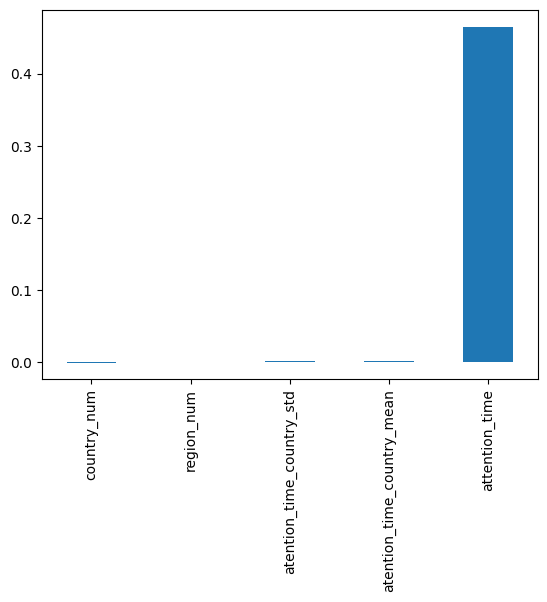

In [10]:
# column names and plot correlation from a target feature
print("Columns:", df.columns.tolist())

target = 'attention_category_num'
df.select_dtypes(include=['number']).corr()[target].sort_values().drop(target).plot(kind='bar')

In [11]:
#!pip install ydata_profiling
from ydata_profiling import ProfileReport
profile_obj = ProfileReport(df, title='Call Center Comments Profile')
profile_obj.to_file('html-files/call_center_comments_profile.html')
profile_obj

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/ca-sierra-v/.pyenv/versions/3.11.9/envs/data_science_course/lib/python3.11/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3 0 3 ... 6 6 0]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/home/ca-sierra-v/.pyenv/versions/3.11.9/envs/data_science_course/lib/python3.11/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 5 0 ... 5 5 7]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/home/ca-sierra-v/.pyenv/versions/3.11.9/envs/data_science_course/lib/python3.11/site-packages/ydata_profiling/model/pandas/discretize_pan

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Extract-Transform-Load Pipelines



In [7]:
# Extract-Transform-Load Pipelines

# Step 1: Import Required Libraries
import pandas as pd

# Step 2: Define Functions for DataFrame Manipulation
def merge_dataframes(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function merges two dataframes from different sources
    and it is used as an intermediate step in the ETL pipeline.

    Args:
        df (DataFrame): Input reference dataframe

    Returns:
        A dataframe with merged data from two sources
    """
    students_csv_df = pd.read_csv('csv-files/StudentsInfo.csv')
    students_csv_df.columns = students_csv_df.columns.str.lower()
    students_json_df = pd.read_json('json-files/StudentsInfo.json')
    result_df = pd.merge(students_csv_df, students_json_df, on='name')
    return result_df

def clean_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function cleans the input dataframe by removing null values
    and duplicates.

    Args:
        df (DataFrame): Input reference dataframe

    Returns:
        A cleaned dataframe
    """
    # There is no problem fillin all null values
    df = df.fillna('Lost Value')
    # Drop duplicates
    df = df.drop_duplicates()
    return df

def pretty_presentation(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function formats the dataframe for pretty presentation.

    Args:
        df (DataFrame): Input reference dataframe

    Returns:
        A formatted dataframe
    """
    df.columns = df.columns.str.title()
    df = df.set_index('Name')
    columns = ['Position', 'Career', 'Company', 'College', 'Salary']
    df = df[columns]
    return df

def save_students_info(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function saves the students' information in a CSV file.

    Args:
        df (DataFrame): Input reference dataframe

    Returns:
        A dataframe with the students' information
    """
    df.to_csv('csv-files/students_final.csv')
    return df

# Step 3: Create the Pipeline
final_df = (
                pd.DataFrame().
                pipe(merge_dataframes).
                pipe(clean_df).
                pipe(pretty_presentation).
                pipe(save_students_info)
          )
final_df.head()

Index(['name', 'company', 'position', 'salary'], dtype='object')
Index(['id', 'name', 'career', 'college'], dtype='object')


,Position,Career,Company,College,Salary
Name,,,,,
Alice Johnson,Petroleum engineer,Computer Science,"Hernandez, Griffith and Nelson",Tech University,4740
David Jones,"Geologist, engineering",Biology,Gomez-Garcia,Science College,73329
Eva Brown,Microbiologist,Physics,Blevins LLC,Tech University,83245
Frank Davis,Museum education officer,Chemistry,Greene-Wilson,Science College,74390
Jack Anderson,"Scientist, research (maths)",Software Engineering,Butler PLC,Tech University,69851
